# Diabetes Prediction
- The objective of this project is to classify whether someone has diabetes or not.
- Dataset consists several Medical Variables(Independent) and one outcome variable(dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).
- Database url :- https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 1. Importing required libraries

In [1]:
import numpy as np #to work with numerical analysis
import pandas as pd #used for data manipulation
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

## 2. Loading datset

In [2]:
df=pd.read_csv("diabetes.csv")

## 3. Exploratory data Analysis
Here we're gonna find :-
### a. Understanding the dataset
- Head of the dataset
- shape of the data set
- types of columns
- information about data set
- Summary of the data set

In [3]:
#see the first n rows, default n=5
df.head(n=7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
df.shape #getting to know about rows and columns we're dealing with

(768, 9)

In [5]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes #helps for computation 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info() #finding if our data set has any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe() #helps us to understand how data has been spread across the table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### b. Data Cleaning
Here we are going to focus on :-
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value

In [9]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [10]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Theory :- checking for 0 values - Pregnancies(Number of pregnancies), Diabetes degree function can be 0 but all other values such as glucose , blood pressure etc cannot be medically 0 for any human being
so our best bet is to replace those 0 values by the mean of that column like the mean BP of people 

In [11]:
#checking for 0 values
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [12]:
#replacing 0 values with mean of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

## 4. Data Visualization
Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :-  to see if data is normally distributed or skewed
- Scatter plots :-  to understand relationship between any two variables
- Pair plot :-  to create scatter plot between all the variables
- Correlation Analysis between variables to understand the strength of their relationship

<AxesSubplot:xlabel='Outcome', ylabel='count'>

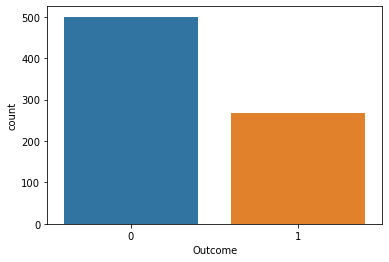

In [13]:
sns.countplot('Outcome',data=df)
# We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced

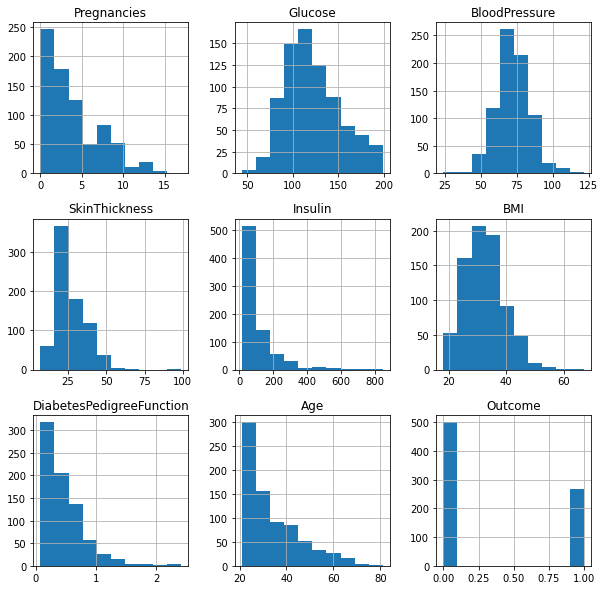

In [14]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()
# we observe that only glucose and Blood Pressure are normally distributed rest others are skewed

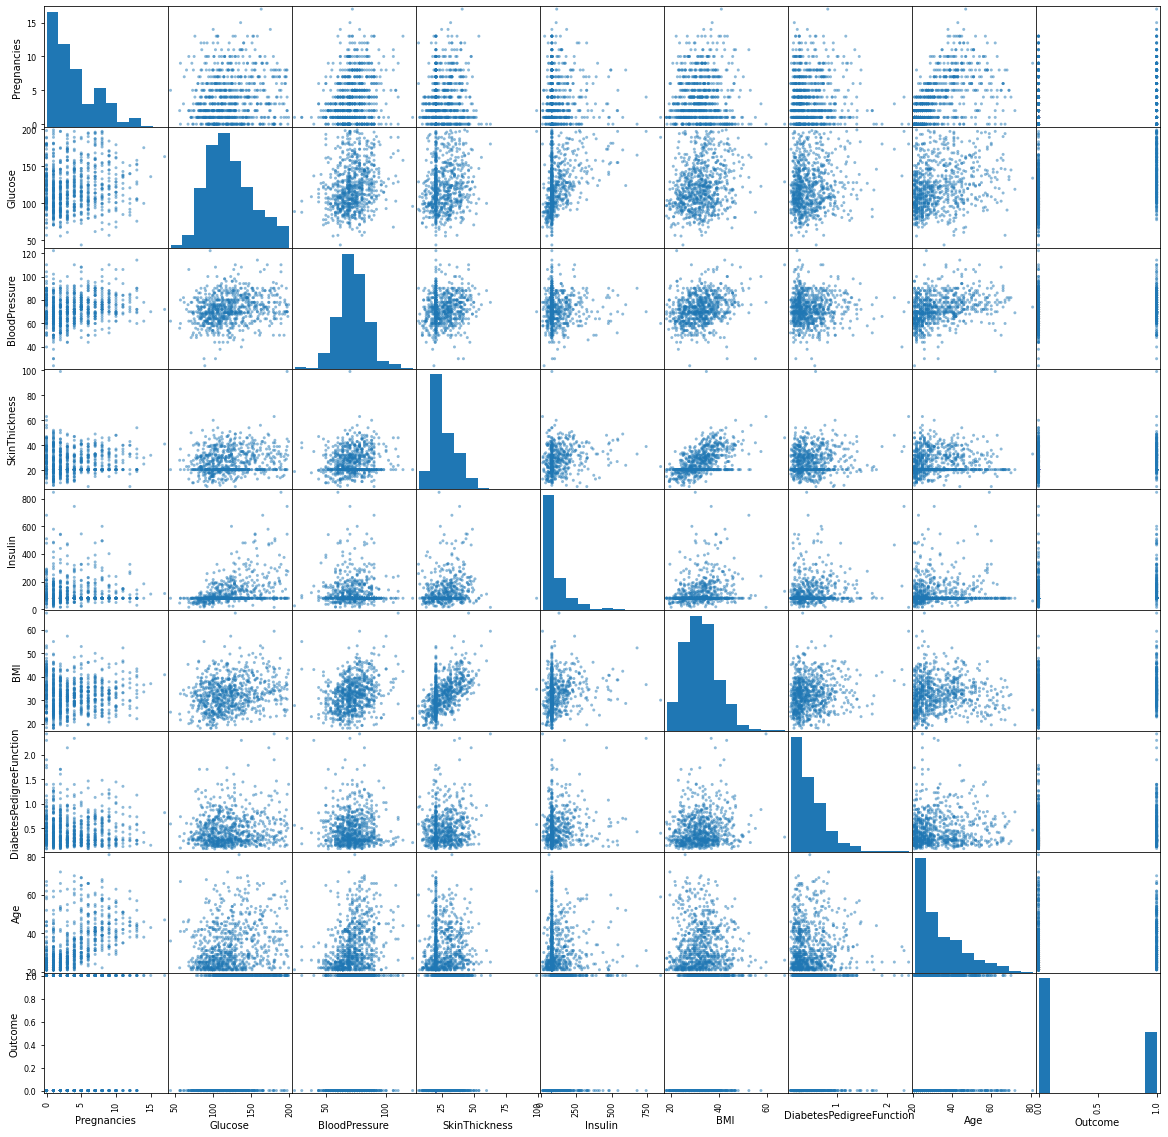

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to  conclusion looking at these plots like if you observe 5th plot in pregnancies with insulin you can conclude that women with higher number of pregnancies have lower insulin

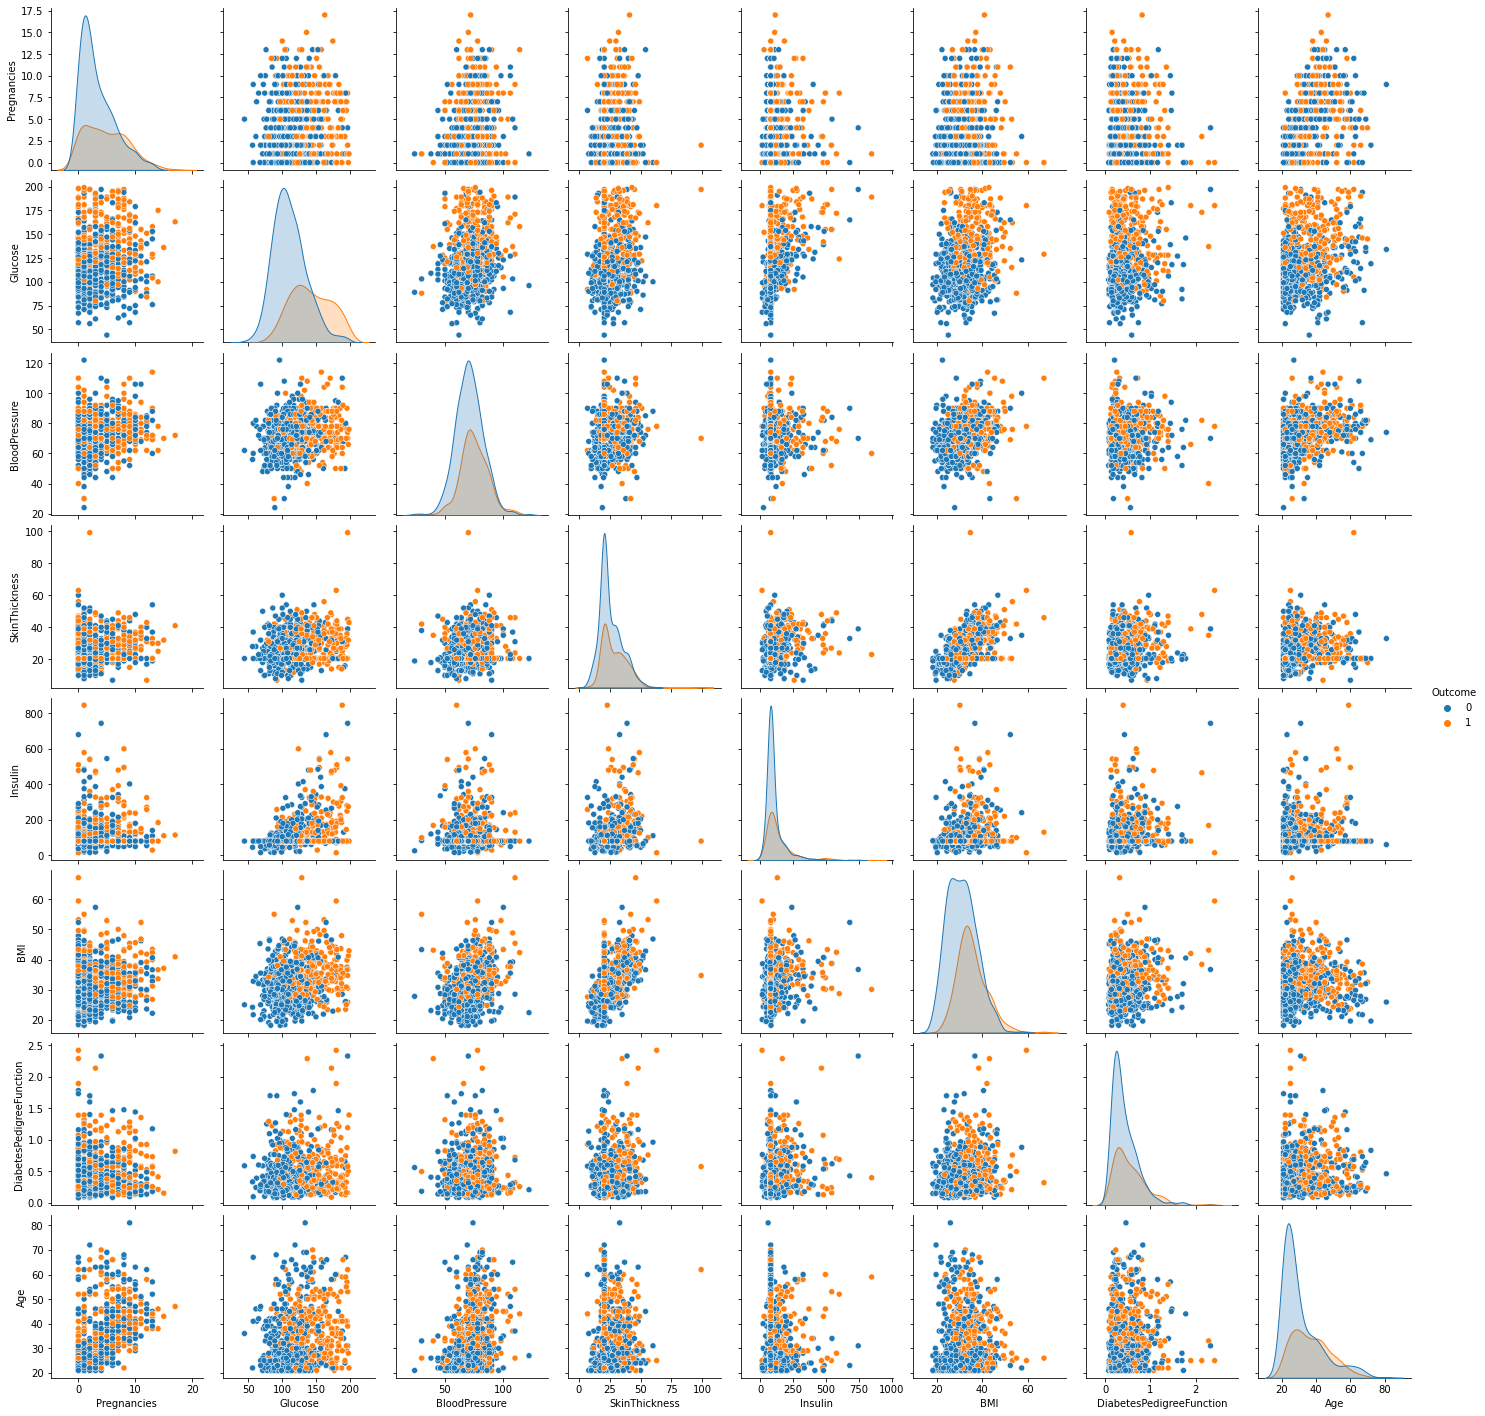

In [16]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

<AxesSubplot:>

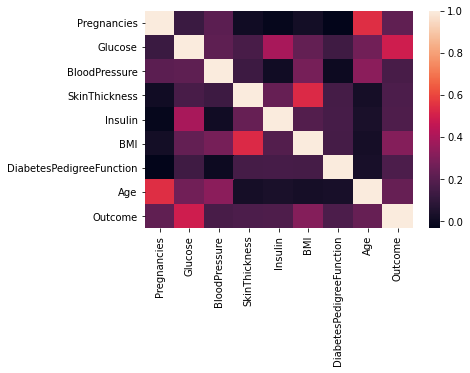

In [17]:
corrmat=df.corr()# 1 being highly correlated and 0 being no correlation at all
sns.heatmap(corrmat)

## 5. Split the Data Frame into X and y

In [18]:
target_name='Outcome'

y= df[target_name]#given predictions
X=df.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 6. Apply Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
SSX=scaler.transform(X)

## 7. TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(SSX,y,test_size=0.2,random_state=2)#splitting data in 80% train, 20%test

In [23]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [24]:
X_test.shape,y_test.shape

((154, 8), (154,))

## 8. Build the CLASSIFICATION Algorithm

### a. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr') #creating an object
lr.fit(X_train,y_train) #training the model

LogisticRegression(multi_class='ovr', solver='liblinear')

In [26]:
lr_pred=lr.predict(X_test)#making predictions on test data

In [27]:
lr.score(X_train,y_train) #training score

0.7768729641693811

In [28]:
lr.score(X_test,y_test) #test score

0.7727272727272727

### b. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn_pred=knn.predict(X_test)

In [31]:
knn.score(X_test,y_test) #test score

0.7532467532467533

In [32]:
knn.score(X_train,y_train) #training score

0.8127035830618893

### c. Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [34]:
nb.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [35]:
nb.score(X_test,y_test) #test score

0.7337662337662337

In [36]:
nb.score(X_train,y_train) #training score

0.750814332247557

### d. Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [38]:
sv.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [39]:
sv.score(X_test,y_test) #test score

0.7597402597402597

In [40]:
sv.score(X_train,y_train) #training score

0.8224755700325733

### e. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dt_pred=dt.predict(X_test)

In [43]:
dt.score(X_test,y_test) #test score

0.7402597402597403

In [44]:
dt.score(X_train,y_train) #training score

1.0

### f. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
rf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [47]:
rf.score(X_test,y_test) #test score

0.7402597402597403

In [48]:
rf.score(X_train,y_train) #training score

1.0